# Loan Prediction III Data competition

link: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
        
# Problem Statement
## About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

# Objective
To do data exploration in Loan Prediction dataset and do some machine learning modeling.

In [1]:
import pandas as pd
# Loading data
train = pd.read_csv(r"C:\Users\LW130003\Desktop\Data Science\Data Science Projects\New folder\loan prediction iii\train.csv", 
                   index_col="Loan_ID")

# Steps of Data Exploration and Preparation
1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

Finally, we will need to iterate over steps 4 – 7 multiple times before we come up with our refined model.

# #1 Variable identification
First, identify Predictor (Input) and Target (Output)variables. Next, identify the data type and category of the variables.

Predictor: All features except Loan_Status

Target variable is: Loan_Status

In [2]:
# Data info
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


Above, we have the data info, we have 12 features: 5 numeric and 7 categorical. It also tells us that every feature have 614 entries and features that have missing values.

In [3]:
# Number of missing value
train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Above, we have the code that print the number of missing value. In case you are lazy to calculate it from the data info.

In [4]:
# Numerical Data
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Above, we have the statistic summary of the numeric feature. 
- **Count**: tell us the number of entries for each feature, feature with less than 614 entries are features with missing values.
- **Mean**: mean value
- **std**: standard variation
- **min**: minimum value
- **25%**: 1st Quartile
- **50%**: 2nd Quartile or Median
- **75%**: 3rd Quartile
- **max**: maximum value
From the summary statistic we could also see that:
ApplicantIncome, CoapplicantIncome, Loan_Amount_Term, Credit_History are right-skewed and LoanAmount is left skewed (it could be seen more clearly when we plot the histogram).

In [5]:
# Categorical data
train.describe(include=['O'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Above, we print the categorical feature.
- count: number of entries for each features.
- unique: number of unique entry or value
- top: value with the most frequency
- freq: number of top value's frequency

In [6]:
# List of feature in data set
categories = train.describe(include=['O']).columns.values.tolist()

# loop and print the categorical feature unique value
for feature in categories:
    print(str(feature)+ ':' + str(train[feature].unique()))

Gender:['Male' 'Female' nan]
Married:['No' 'Yes' nan]
Dependents:['0' '1' '2' '3+' nan]
Education:['Graduate' 'Not Graduate']
Self_Employed:['No' 'Yes' nan]
Property_Area:['Urban' 'Rural' 'Semiurban']
Loan_Status:['Y' 'N']


Above, we print the unique value of each categorical feature.

# #2 Univariate Analysis

**Central Tendency**: Mean, Median, Mode, Min, Max

**Measure of Dispersion**: Range, Quartile, IQR, Variance, Standard Deviation, Skewness and Kurtosis.

**Visualization**: Histogram, Boxplot.

As most of the answer can be found in summary statistics. In this section we will use Histogram, Boxplot to visualize the numerical value.

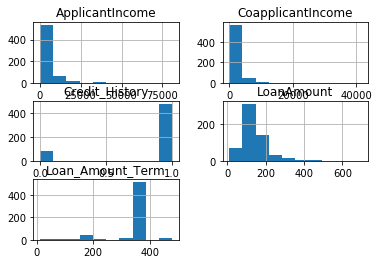

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# Numerical variable histogram
train.hist();

Above, we print the histogram plot and visualize the distribution of value for each feature.

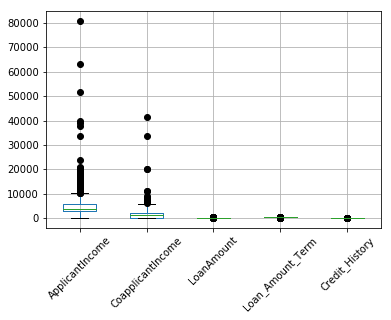

In [8]:
train.boxplot(rot=45,sym='k');

Above, we print the box and whisker plot for each numerical value. From here we can observe the outliers.

# #3 Bi-variate Analysis

Bi-variate analysis finds out the relationship between two variables. The combination can be: Categorical & Categorical, Continuous & Continuous, Categorical & Continuous. Different methods are use to tackle these combinations.

**1. Continous & Continuous**: bi-variate analysis is done with scatter plot. The relationship can be linear or non-linear. To measure the strength of the relationship, we compute their Correlation. Correlation values are between -1 and +1.
    - -1: pefect negative linear correlation
    - 0: no correlation
    - +1: perfect positive linear correlation

**2. Categorical & Categorical**: methods to find relationship between two categorical variables:
    - Two-way table
    - Stacked Column Chart
    - Chi-Square Test
**3. Categorical & Continuous**: can be done with pivot table, draw box plots for each level of categorical variables. If levels are small in numbers, it will not show statistical significance. To look at the statistical significance we can perform Z-Test, T-Test or ANOVA.

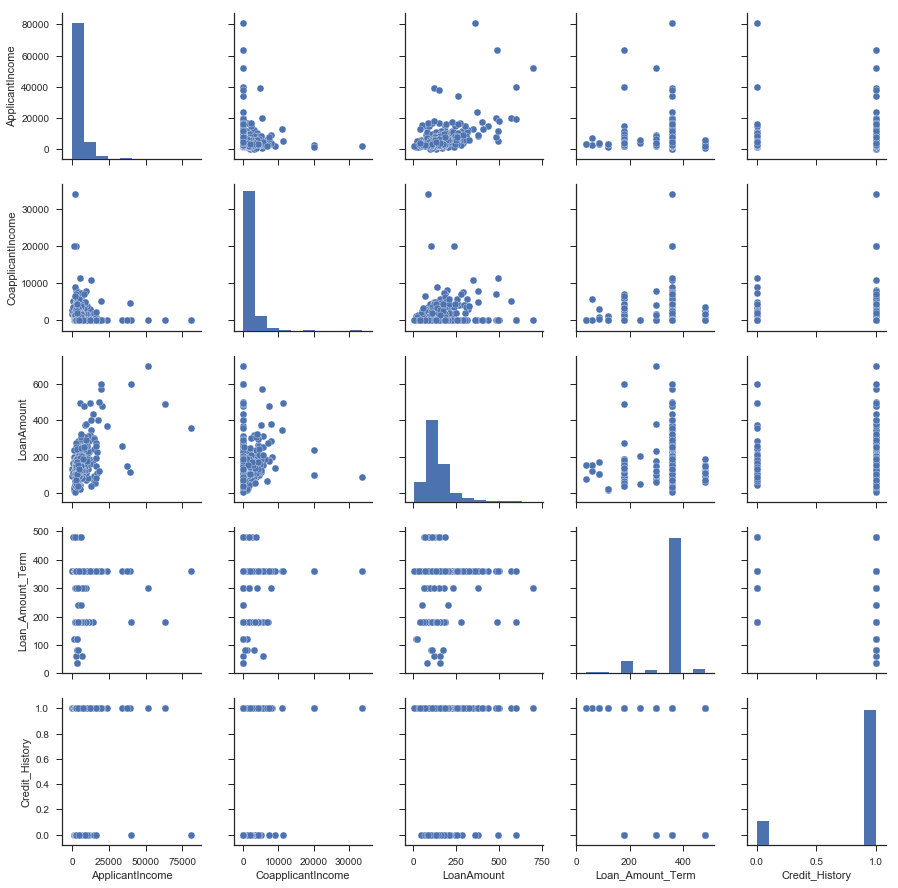

In [9]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
numericals = train.describe().columns.values.tolist()
g = sns.pairplot(train[numericals].dropna())

Above, We do scatter plot and bar plot for each numerical features. From the plots it could be predicted that there is no strong correlation between each features. As there are no plot that clearly linear.

In [10]:
train[numericals].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


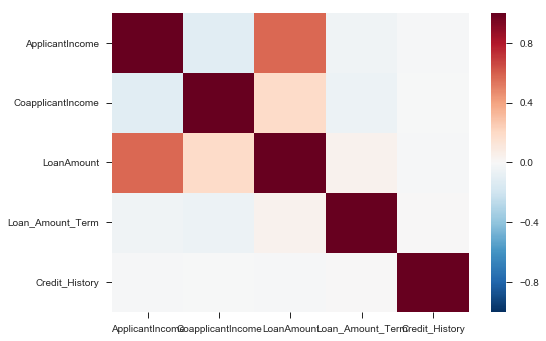

In [11]:
# Plotting heatmap
sns.heatmap(train[numericals].corr());

Above, we print the correlation value and heatmap of the datasets and indeed there are no strong correlation between the features.

In [12]:
train.columns.values.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

Above, we print the feature name of the dataset. Next, we do stacked bar plot for each feature.

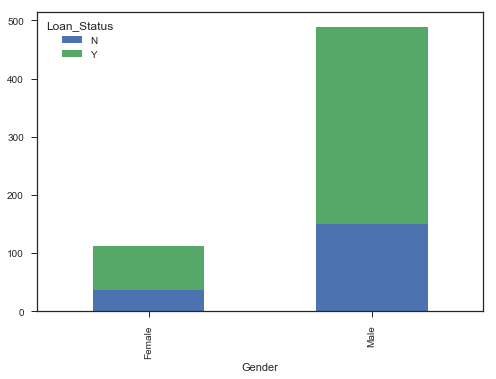

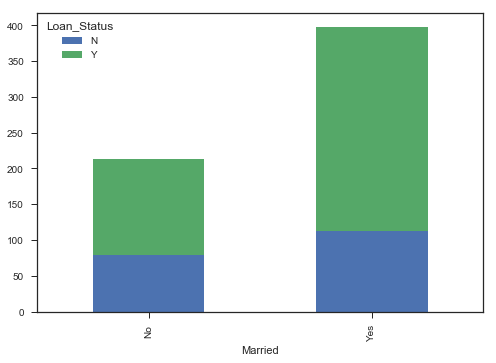

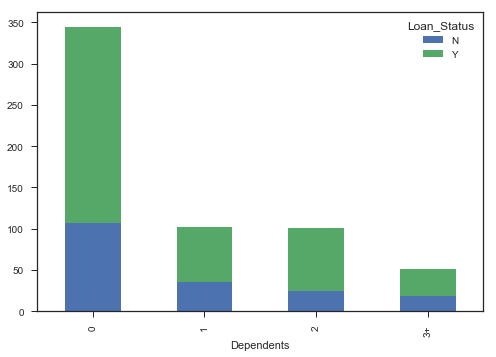

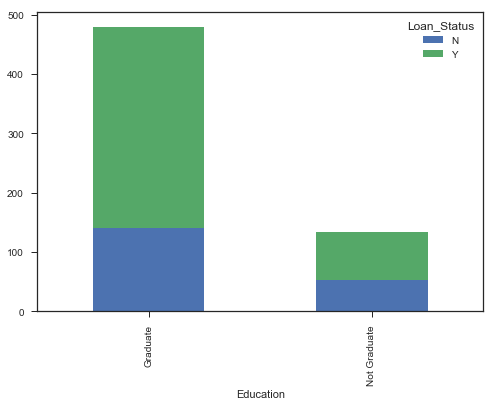

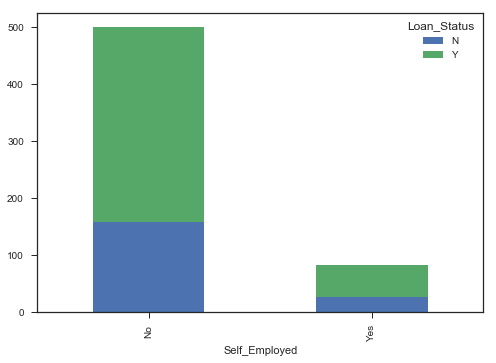

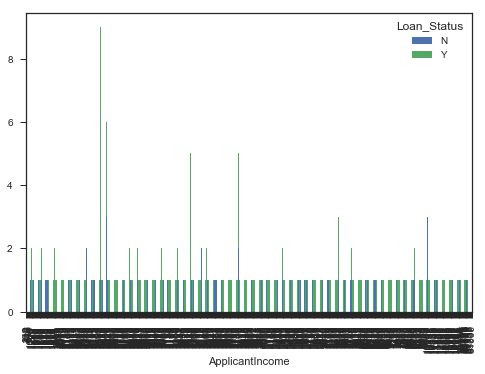

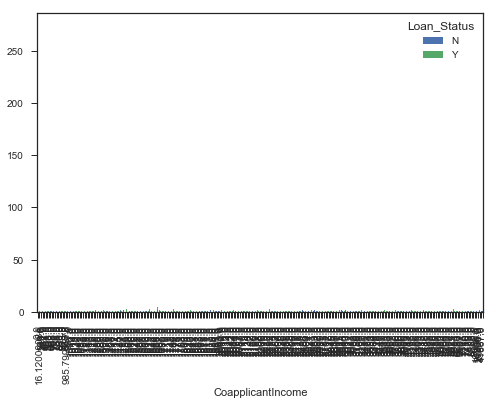

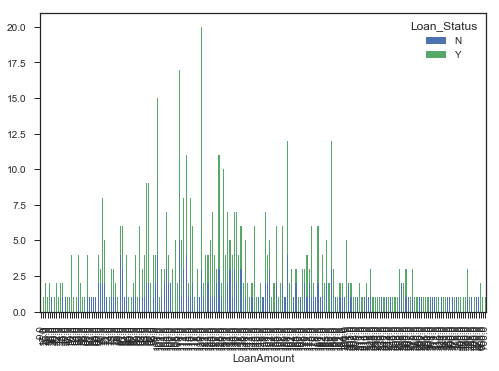

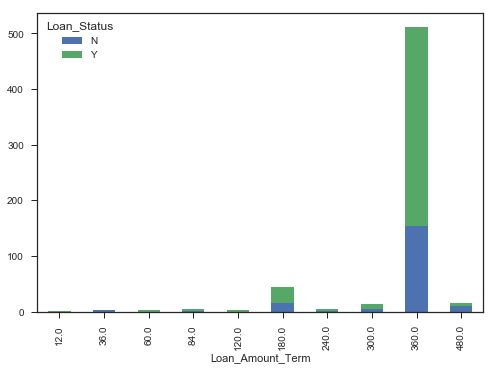

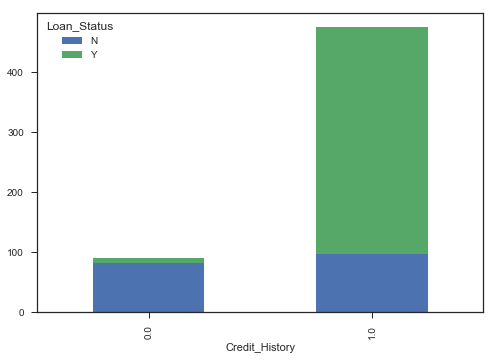

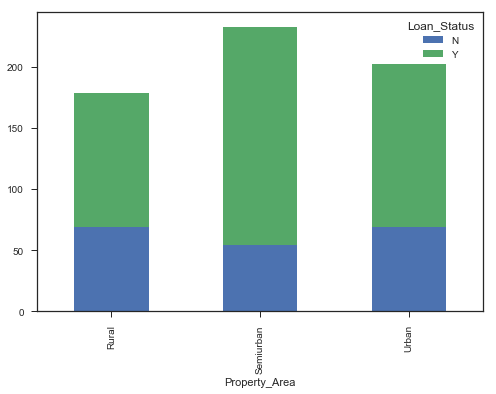

In [13]:
axes = ['Gender','Married','Dependents','Education',
'Self_Employed','ApplicantIncome','CoapplicantIncome',
'LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']

for i,a in enumerate(axes):
    temp = pd.crosstab(train[a].dropna(),train['Loan_Status'])
    temp.plot(kind='bar',grid=False,stacked=True,rot=90)

From all the stacked bar charts above, the features that most likely affect whether a loan is approved or not is Credit_History feature.

# #4 Missing Value Treatment

Missing data in the training data set can reduce the power / fit of a model or can lead to a biased model. In this section, we will fix the missing value in the dataset.

**Methods to treat missing values**
1. Deletion
    - **List Wise Deletion**, delete observation where any of the variable is missing. Advantage: Simple, Disadvantage: Reduce the sample size, thus reducing the power of model.
    - **Pair Wise Deletion**, perform analysis with all cases in which the variables of interest are present. Advantage: keep as many cases available for analysis. Disadvantage: different variables have different sample size.

2. Mean/Mode/Imputation: fill the missing values 

In [14]:
# Fill the missing value in 6 features with mean/mode/median
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean(),inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mean(),inplace=True)

In [15]:
import numpy as np
table = train.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [16]:
# Check the missing value in feature married
train[train.isnull().any(axis=1)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001357,Male,NaN,0,Graduate,No,3816,754.0,160.000000,360.0,1.0,Urban,Y
LP001760,Male,NaN,0,Graduate,No,4758,0.0,158.000000,480.0,1.0,Semiurban,Y
LP002393,Female,NaN,0,Graduate,No,10047,0.0,146.412162,240.0,1.0,Semiurban,Y


In [17]:
# Drop the missing observations in married features
train = train.dropna(axis=0)

In [18]:
# Check if there is still any missing column
train.isnull().sum(0)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Next, we will create two new feature LoanAmount_log and TotalIncome_log which is the log value of LoanAmount and TotalIncome features

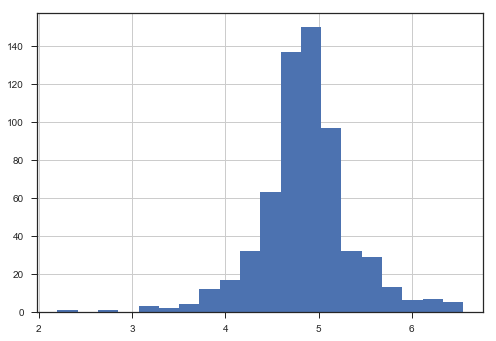

In [19]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

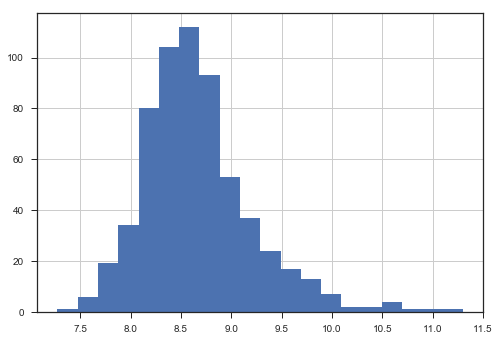

In [20]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=20)

# #5 Building Predicitive Model 

Next, we will create a model to predict whether a loan is approved or not.
First, we will load all the model needed:
- LabelEncoder for One Hot Encoder (to handle the categorical data), some machine learning algorithm is unable to handle categorical data. Thus, we need to convert those categorical data to numeric. One Hot Encoder is one way to do those convertion.
- LogisticRegression to access Logistic Regression Machine Learning Algorithm
- KFold to create multiple k-fold in data for crass_validation.
- RandomForestClassifier to access Random Forest Machine Learning Algorithm
- DecisionTreeClassifier  to access Decision Tree Machine Learning Algorithm
- metrics to evaluate the model performance.

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

C:\Users\LW130003\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Many ML algorithm cannot accept string value, convert categorical data into numerical
# One hot encoder
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()

for i in var_mod:
    train[i] = le.fit_transform(train[i].values.tolist())

train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [23]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
Loan_ID,,,,,,,,,,,,,,,
LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [24]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train] 
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

In [25]:
# Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


In [26]:
# Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


Generally, we expect the accuracy to increase on adding variables. But this is a more challenging case the accuracy and cross validation score are not getting impacted by less important variables. Credit_History is dominating the mode. We have two options now:
1. Feature Engineering: derive new information and try to predict those.
2. Better modelling technique

In [27]:
# Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Gender',
'Married']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 68.576%
Cross-Validation Score : 68.578%


In [28]:
# Logistic Regression
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


In [29]:
train.columns.values.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log']

In [30]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


Using feature Credit_History feature as predictor_var give the best results. Let's try using more complex models.

In [31]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.852%


In [32]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Married','Education']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 80.851%
Cross-Validation Score : 80.689%


In [33]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 81.178%
Cross-Validation Score : 81.016%


There is not much improvement after changing the algorithm and increasing the number of features used. From above, we could see that categorical variables is unable to have an impact because Credit_History is dominating over them. Let's try a few numerical varibles and include the new feature we create (LoanAmount_log and TotalIncome_log).

In [34]:
# Decision Tree
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 90.835%
Cross-Validation Score : 69.066%


The accuracy went up on adding variables, the cross validation went down. A sign of overfitting. Let's try Random Forest (More sophisticated algorithm)

In [35]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'TotalIncome',
 'TotalIncome_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.561%


In [36]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'LoanAmount_log',
 'TotalIncome_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 76.921%


Create a feature importance matrix. Check which feature is the most important.

In [37]:
#Create a seroew with feature importances:
featimp = pd.Series(model.feature_importances_,index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.279803
TotalIncome_log     0.213671
LoanAmount          0.147571
LoanAmount_log      0.140724
Property_Area       0.044774
Dependents          0.044506
Loan_Amount_Term    0.041023
Education           0.024133
Married             0.024070
Self_Employed       0.020863
Gender              0.018862
dtype: float64


Indeed, Credit_History is the most important features.

In [38]:
# Use the top 5 variables
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Credit_History',
                 'TotalIncome_log',
                 'TotalIncome',
                 'ApplicantIncome',
                 'LoanAmount_log']
classification_model(model,train,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 77.909%


The high accuracy and low cross-validation score is a sign of overfitting. This means the model is to complex and pruning of decision tree is needed.

In conclusion:
1. Using a more sophisticated model does not guarantee better results
2. Avoid using complex modeling techniques as a black box without understanding the underlying concept. Doing so would increase the tendency of overfitting thus  making your models less interpretable.
3. Feature Engineering is the key to success. Everyone can use an sophisticated model but the real art and creativity lies enhancing your features to better suit the model.